In [1]:
import pandas as pd
import netCDF4 as nc
import torch
import matplotlib.pyplot as plt

In [2]:
file_path = '/home/vannsh.jani/brick_kilns/githubrepo/Machine-Learning/V5GL04.HybridPM25.Asia.200601-200612.nc'

netcdf_file = nc.Dataset(file_path, 'r')

print(netcdf_file.variables.keys())



dict_keys(['lon', 'lat', 'GWRPM25'])


In [3]:
# convert to tensors
lat = torch.tensor(netcdf_file.variables['lat'][:])
lon = torch.tensor(netcdf_file.variables['lon'][:])
pm25 = torch.tensor(netcdf_file.variables['GWRPM25'][:])
lat.shape,lon.shape,pm25.shape


(torch.Size([5500]), torch.Size([8000]), torch.Size([5500, 8000]))

In [4]:
print(f"Minimum latitude: {lat.min()}")
print(f"Maximum latitude: {lat.max()}")
print(f"Minimum longitude: {lon.min()}")
print(f"Maximum longitude: {lon.max()}")

Minimum latitude: -9.994999885559082
Maximum latitude: 44.994998931884766
Minimum longitude: 65.00499725341797
Maximum longitude: 144.9949951171875


In [5]:
df = pd.read_csv("model_kilns.csv")
df.head()

,lat,long,label,prob,prediction
0,21.111399,92.184783,fck,0.992835,zigzag
1,21.112910,92.184072,fck,0.954465,zigzag
2,21.115673,92.173307,fck,0.766403,zigzag
3,21.115673,92.182674,fck,0.653799,zigzag
4,21.214110,92.179388,fck,0.011561,fck


In [6]:
df.shape

(6978, 5)

In [7]:
print(f"Minimum latitude of brick kiln: {df['lat'].min()}")
print(f"Maximum latitude of brick kiln: {df['lat'].max()}")
print(f"Minimum longitude of brick kiln: {df['long'].min()}")
print(f"Maximum longitude of brick kiln: {df['long'].max()}")

Minimum latitude of brick kiln: 21.11139857
Maximum latitude of brick kiln: 26.37061828
Minimum longitude of brick kiln: 88.0555548
Maximum longitude of brick kiln: 92.47820173


In [8]:
lat_bangladesh = lat[lat > 21]
lat_bangladesh = lat_bangladesh[lat_bangladesh < 27]
lon_bangladesh = lon[lon > 87]
lon_bangladesh = lon_bangladesh[lon_bangladesh < 93]
lat_bangladesh.shape, lon_bangladesh.shape

(torch.Size([600]), torch.Size([600]))

In [9]:
lat_bangladesh.min(), lat_bangladesh.max(), lon_bangladesh.min(), lon_bangladesh.max()

(tensor(21.0050, dtype=torch.float64),
 tensor(26.9950, dtype=torch.float64),
 tensor(87.0050, dtype=torch.float64),
 tensor(92.9950, dtype=torch.float64))

In [10]:
pm25_bangladesh = pm25[torch.where(lat == lat_bangladesh[0])[0].item():torch.where(lat == lat_bangladesh[len(lat_bangladesh)-1])[0].item()+1, torch.where(lon == lon_bangladesh[0])[0].item():torch.where(lon == lon_bangladesh[len(lon_bangladesh)-1])[0].item()+1]
pm25_bangladesh.shape

torch.Size([600, 600])

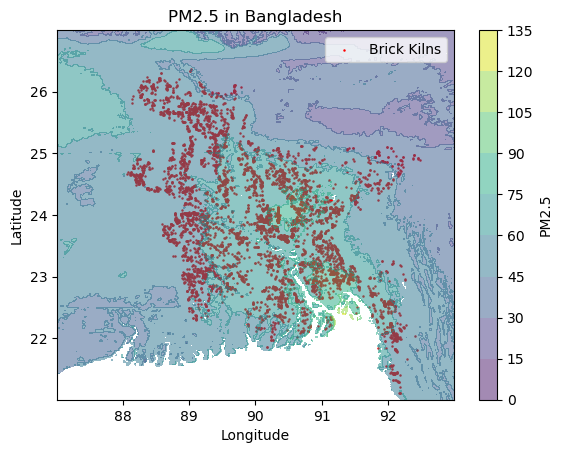

In [22]:
plt.scatter(df['long'], df['lat'],c="red", s=0.6,label='Brick Kilns')
plt.contourf(lon_bangladesh, lat_bangladesh, pm25_bangladesh,alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("PM2.5 in Bangladesh")
plt.colorbar(label="PM2.5")
plt.legend()
plt.show()

In [13]:
pm25_bangladesh.min(), pm25_bangladesh.max()

(tensor(nan), tensor(nan))

In [ ]:
torch.__version__

'2.1.2+cu121'

In [17]:
torch.where(torch.isnan(pm25_bangladesh),torch.inf,pm25_bangladesh).min()

tensor(13.9000)